In [ ]:
# import all the packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import data as da

In [ ]:
data_pro = da.Data()
df = data_pro.read_data()

X, y = data_pro.split_x_y(df)
X, X_train, X_test, y_train, y_test = data_pro.data_processing(X, y)

# Stacking

The basic regression algorithm we use is SVM, decision tree and multi-layer perceptron, and the final estimator is SVM

In [16]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

svm_reg = SVR(C=0.1)
dt_reg = DecisionTreeRegressor()
mlp_reg = MLPRegressor(hidden_layer_sizes=(5, 2), alpha=0.01, learning_rate='invscaling')

In [17]:
from sklearn.ensemble import StackingRegressor
stacking_reg = StackingRegressor(
    estimators=[('svm', SVR(C=0.1)), ('df', DecisionTreeRegressor()), ('mlp', MLPRegressor(hidden_layer_sizes=(5, 2), alpha=0.01, learning_rate='invscaling'))],
          final_estimator=SVR(C=0.1))

In [18]:
stacking_reg.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer

StackingRegressor(estimators=[('svm', SVR(C=0.1)),
                              ('df', DecisionTreeRegressor()),
                              ('mlp',
                               MLPRegressor(alpha=0.01,
                                            hidden_layer_sizes=(5, 2),
                                            learning_rate='invscaling'))],
                  final_estimator=SVR(C=0.1))

In [19]:
for reg in (svm_reg, dt_reg, mlp_reg):
    reg.fit(X_train, y_train)

Through the experimental results, it can be found that the stacking method score surpasses the single model method

In [20]:
model_names, test_acc = [], [] 
for reg in (svm_reg, dt_reg, mlp_reg, stacking_reg):
    print(reg.__class__.__name__)
    model_names.append(reg.__class__.__name__)
    train_score = reg.score(X_train, y_train)
    print('\ttrain:', train_score)
    test_score = reg.score(X_test, y_test)
    print('\ttest:', test_score)
    test_acc.append(test_score)

SVR
	train: 0.08439733222078338
	test: 0.07119659490158681
DecisionTreeRegressor
	train: 1.0
	test: -0.7478908944823859
MLPRegressor
	train: 0.2964589603695563
	test: 0.09997166636316057
StackingRegressor
	train: 0.4759929681673639
	test: 0.2153818864043613


<BarContainer object of 4 artists>

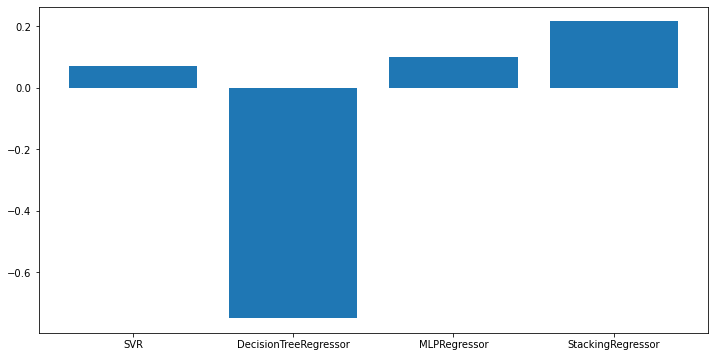

In [21]:
plt.figure(figsize=(12, 6))
plt.bar(model_names, test_acc)

# Boosting (AdaBoost)

In [22]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=1), n_estimators=200)

In [23]:
ada_reg.fit(X_train, y_train)

print(ada_reg.__class__.__name__, '(DecisionStumps)')
train_score = ada_reg.score(X_train, y_train)
print('\ttrain:', train_score)
test_score = ada_reg.score(X_test, y_test)
print('\ttest:', test_score)

AdaBoostRegressor (DecisionStumps)
	train: 0.1843863095846927
	test: 0.14633797916549984


Pick a suitable n_estimator parameter

In [24]:
n_list = list(range(1,11,1))
test_accs = []
for n in n_list:
  ada_reg = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=1), n_estimators=n)
  ada_reg.fit(X_train, y_train)

  print(ada_reg.__class__.__name__, '(DecisionStumps)')
  train_score = ada_reg.score(X_train, y_train)
  print('\ttrain:', train_score)
  test_score = ada_reg.score(X_test, y_test)
  test_accs.append(test_score)
  print('\ttest:', test_score)

AdaBoostRegressor (DecisionStumps)
	train: 0.1757058507887751
	test: 0.05121016130093847
AdaBoostRegressor (DecisionStumps)
	train: 0.1708669880898086
	test: 0.051524839478112705
AdaBoostRegressor (DecisionStumps)
	train: 0.18431248190919303
	test: 0.09220179766957382
AdaBoostRegressor (DecisionStumps)
	train: 0.1849088152981997
	test: 0.09766832555673166
AdaBoostRegressor (DecisionStumps)
	train: 0.1809824220981907
	test: 0.1371163511176826
AdaBoostRegressor (DecisionStumps)
	train: 0.19186654183583618
	test: 0.11903049547472522
AdaBoostRegressor (DecisionStumps)
	train: 0.18763923704996566
	test: 0.1492649385943331
AdaBoostRegressor (DecisionStumps)
	train: 0.19358027026858005
	test: 0.14837254815833123
AdaBoostRegressor (DecisionStumps)
	train: 0.17943114334075427
	test: 0.15149067595438492
AdaBoostRegressor (DecisionStumps)
	train: 0.18216371084651295
	test: 0.1489855097178343


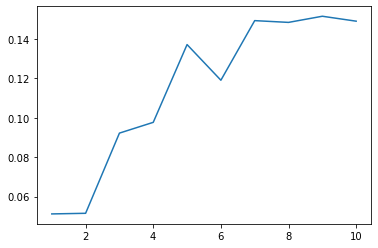

In [25]:
plt.plot(n_list,test_accs)

In [26]:
best_ada_reg = AdaBoostRegressor(
  DecisionTreeRegressor(max_depth = 1), n_estimators = n)
best_ada_reg.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1),
                  n_estimators=10)

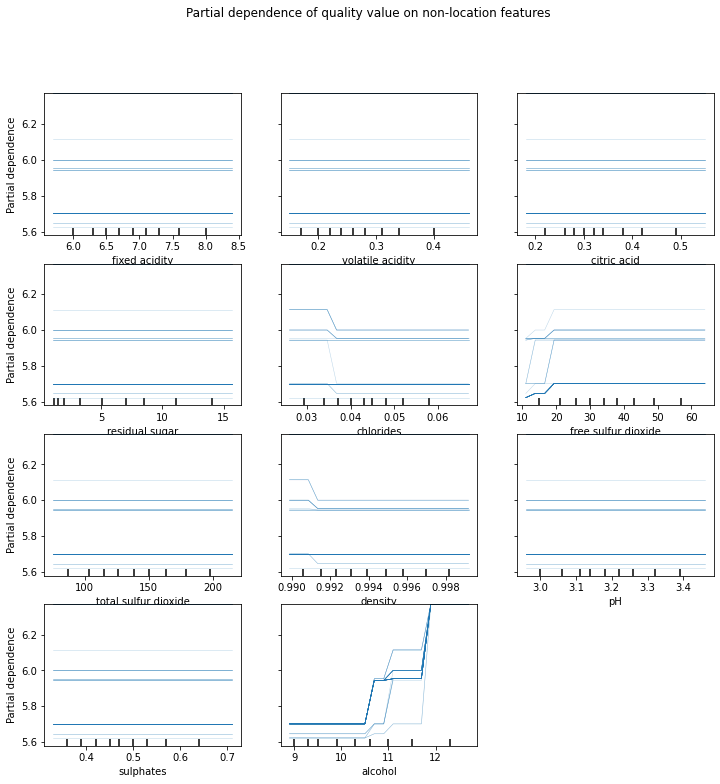

In [27]:
from sklearn.inspection import plot_partial_dependence
features = list(range(11))
feature_names = list(df.columns.values)[:-1]
display = plot_partial_dependence(
    best_ada_reg,
    X_train,
    features,
    feature_names = feature_names,
    kind = "individual",
    subsample = 50,
    n_jobs = 3,
    grid_resolution = 20,
    random_state = 0,
)
display.figure_.suptitle(
    "Partial dependence of quality value on non-location features\n"

)
display.figure_.set_size_inches(12,12)